# <span style="color:#DE1509">Introduction to Pandas Library</span>

Pandas is a powerful module that is optimized on top of Numpy and provides a set of data structures particularly suited to time-series and spreadsheet-style data analysis (think of pivot tables in Excel). If you are familiar with the R statistical package, then you can think of Pandas as providing a Numpy-powered DataFrame for Python. Pandas provides a DataFrame object (among others) built on a Numpy platform to ease data manipulation (especially for time-series) for statistical processing. Pandas is particularly popular in quantitative finance. Key features of Pandas include fast data manipulation and alignment, tools for exchanging data between different formats and between SQL databases, handling missing data, and cleaning up messy data.

###  
#### <span style="color:#127C02">*Reading Data into Pandas Dataframe*</span>

The following script reads the “titanic.csv” file. The first five rows of the Titanic dataset have been printed via the head() method of the Pandas dataframe containing the Titanic dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [1]:
import numpy as np
import pandas as pd

titanic_data = pd.read_csv("./titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The read_csv() method reads data from a CSV or TSV file and stores it in a Pandas dataframe, which is a special object that stores data in the form of rows and columns.

\
To get overall information about dataframe, we can use *.info()*.  
You can get information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [2]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


\
It is important to check a data type for each column.  
Some type may need to be changed/altered later.

In [ ]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

\
To check the dimension of the dataframe we can use .shape.  
.shape[0] for a number of rows.  
.shape[1] for a number of columns.  

In [1]:
titanic_data.shape

NameError: name 'titanic_data' is not defined

In [ ]:
titanic_data.shape[0] #number of rows

891

In [ ]:
titanic_data.shape[1] #number of columns

12

\
Alternatively, we can also use len() to get a number of rows:

In [ ]:
len(titanic_data)

891

\
Use describe() to show overview of dataframe (for numeric column):

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


\
We can use value_counts() for counting unique values for each column, but we may need to specify list of columns.

In [ ]:
titanic_data.Survived.value_counts() #or titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#specify columns to be used with value_counts()
for c in [
        'Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin',
        'Embarked'
]:
    print(f"---{c}---")
    print(titanic_data[c].value_counts())

---Survived---
0    549
1    342
Name: Survived, dtype: int64
---Pclass---
3    491
1    216
2    184
Name: Pclass, dtype: int64
---Sex---
male      577
female    314
Name: Sex, dtype: int64
---Ticket---
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
---Cabin---
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
---Embarked---
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
titanic_data.value_counts()  #each row represent a unique value combined from all columns

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

\
We can check whether dataframe contating missing values using the following command.

In [ ]:
titanic_data.isnull().values.any()

True

However, we already know that there is missing values in dataframe when we use .info.

###  
#### <span style="color:#127C02">*Filtering Rows*</span>

One of the most routine tasks that you need to perform while handling Pandas dataframe is to filter rows based on column values.
To filter rows, you have to first identify the indexes of the rows to filter. For those indexes, you need to pass True to the opening and closing square brackets that follow the Pandas dataframe name.
The following script returns a series of True and False. True will be returned for indexes where the Pclass column has a value of 1.

In [ ]:
titanic_data.Pclass == 1

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Pclass, Length: 891, dtype: bool

In [ ]:
titanic_data[titanic_data.Pclass == 1]
#or
#titanic_data[titanic_data['Pclass'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
titanic_data[titanic_data.Pclass == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


\
Another commonly used operator to filter rows is the isin operator. The isin operator takes a list of values and returns only those rows where the column used for comparison contains values from the list passed to the isin operator as a parameter.

In [ ]:
titanic_data[titanic_data.Pclass.isin([1])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


\
If we want rows with Pclass = 1 or 2:

In [ ]:
titanic_data[titanic_data.Pclass.isin([1, 2])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
titanic_data[titanic_data.Pclass.isin([1, 2]) &
             (titanic_data.Sex == 'female') ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


\
Pandas also provide .query() method for using column names in filtering.

In [ ]:
titanic_data.query('Pclass == 1 & Age >= 20 & Age <= 30').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


In [ ]:
titanic_data.query('Pclass == 1 & Survived == 1').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


###  
#### <span style="color:#127C02">*Filtering Columns*</span>

To filter columns from a Pandas dataframe, you can use the filter() method. The list of columns that you want to filter is passed to the filter() method.  
The following script filters Name, Sex, and Age columns from the Titanic dataset and ignores all the other columns.

In [ ]:
titanic_data.filter(["Name", "Sex", "Age"]).head()

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0


\
Alternatively, we can just use a list of column names.

In [ ]:
titanic_data[["Name", "Sex", "Age"]].head()

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0


\
In addition to filtering columns, you can also drop columns that you don’t want in the dataset. To do so, you need to call the drop() method and pass it the list of columns that you want to drop. For instance, the following script drops the Name, Age, and Sex columns from the Titanic dataset and returns the remaining columns.

In [ ]:
# axis = 1 by column indices, axis = 0 by row indices (see next example)
titanic_data.drop(["Name", "Sex", "Age"], axis=1).head()

,PassengerId,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,0,113803,53.1000,C123,S
4,5,0,3,0,0,373450,8.0500,NaN,S


In [ ]:
# axis = 0 by row indices
titanic_data.drop([0, 2, 3], axis=0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


###  
#### <span style="color:#127C02">*loc & iloc*</span>

When it comes to select data on a DataFrame, Pandas *loc* and *iloc* are two top favorites. 

*loc* is label-based, which means that you have to specify rows and columns based on their row and column labels.  
*iloc* is integer position-based, so you have to specify rows and columns by their integer indices.

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
age = titanic_data.loc[1, 'Age']  #get age of row index 1
print(age)
type(age)

38.0


numpy.float64

In [ ]:
age = titanic_data.iloc[1, 5]  #get age (column index 5) of row index 1
print(age)
type(age)

38.0


numpy.float64

In [ ]:
ages = titanic_data.loc[:, 'Age']  #get age values from all rows
print(ages)
type(ages)  #note that the type is series not dataframe

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


pandas.core.series.Series

In [ ]:
ages = titanic_data.iloc[:, 5]  #get age values from all rows
print(ages)
type(ages)  #note that the type is series not dataframe

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


pandas.core.series.Series

In [ ]:
sub = titanic_data.loc[:, ['Pclass', 'Age']]
print(sub)
type(sub)  #type is dataframe

     Pclass   Age
0         3  22.0
1         1  38.0
2         3  26.0
3         1  35.0
4         3  35.0
..      ...   ...
886       2  27.0
887       1  19.0
888       3   NaN
889       1  26.0
890       3  32.0

[891 rows x 2 columns]


pandas.core.frame.DataFrame

In [ ]:
sub = titanic_data.loc[:, 'Pclass':'Age']
print(sub)
type(sub)

     Pclass                                               Name     Sex   Age
0         3                            Braund, Mr. Owen Harris    male  22.0
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0
2         3                             Heikkinen, Miss. Laina  female  26.0
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0
4         3                           Allen, Mr. William Henry    male  35.0
..      ...                                                ...     ...   ...
886       2                              Montvila, Rev. Juozas    male  27.0
887       1                       Graham, Miss. Margaret Edith  female  19.0
888       3           Johnston, Miss. Catherine Helen "Carrie"  female   NaN
889       1                              Behr, Mr. Karl Howell    male  26.0
890       3                                Dooley, Mr. Patrick    male  32.0

[891 rows x 4 columns]


pandas.core.frame.DataFrame

In [ ]:
sub = titanic_data.iloc[:, [2, 5]]
print(sub)
type(sub)  #type is dataframe

     Pclass   Age
0         3  22.0
1         1  38.0
2         3  26.0
3         1  35.0
4         3  35.0
..      ...   ...
886       2  27.0
887       1  19.0
888       3   NaN
889       1  26.0
890       3  32.0

[891 rows x 2 columns]


pandas.core.frame.DataFrame

In [ ]:
sub = titanic_data.iloc[:, 2:6]
print(sub)
type(sub)

     Pclass                                               Name     Sex   Age
0         3                            Braund, Mr. Owen Harris    male  22.0
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0
2         3                             Heikkinen, Miss. Laina  female  26.0
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0
4         3                           Allen, Mr. William Henry    male  35.0
..      ...                                                ...     ...   ...
886       2                              Montvila, Rev. Juozas    male  27.0
887       1                       Graham, Miss. Margaret Edith  female  19.0
888       3           Johnston, Miss. Catherine Helen "Carrie"  female   NaN
889       1                              Behr, Mr. Karl Howell    male  26.0
890       3                                Dooley, Mr. Patrick    male  32.0

[891 rows x 4 columns]


pandas.core.frame.DataFrame

\
***loc* with conditions**

In [ ]:
titanic_data.loc[titanic_data.Age > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
titanic_data.loc[(titanic_data.Age > 70) & (titanic_data.Pclass == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S


\
The A:B used in loc and iloc may have different meaning.  
For *loc*, A and B are included.  
For *iloc*, A is included, B is __excluded__.  

In [ ]:
sub = titanic_data.loc[1:3, :]  #rows 1 to 3
display(sub)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
sub = titanic_data.iloc[1:3, :]  #rows 1 to 2
display(sub)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


###  
#### <span style="color:#127C02">*Concatenating Dataframes*</span>

Oftentimes, you need to concatenate or join multiple Pandas dataframes horizontally or vertically. Let’s first see how to concatenate or join Pandas dataframes vertically. We will first create two Pandas dataframes using Titanic data. The first dataframe contains rows where the passenger class is 1, while the second dataframe contains rows where the passenger class is 2.

In [ ]:
titanic_pclass1_data = titanic_data[titanic_data.Pclass == 1]
print(titanic_pclass1_data.shape)

titanic_pclass2_data = titanic_data[titanic_data.Pclass == 2]
print(titanic_pclass2_data.shape)

(216, 12)
(184, 12)


\
The output shows that both the newly created dataframes have 12 columns. It is important to mention that while concatenating data vertically, <u>both the dataframes should have an equal number of columns.</u>  
There are two ways to concatenate datasets horizontally. You can call the append() method via the first dataframe and pass the second dataframe as a parameter to the append() method. Look at the following script:

In [ ]:
merged_data = titanic_pclass1_data.append(titanic_pclass2_data,
                                          ignore_index=True) #try ignore_index=True and see the difference
print(merged_data.shape)
display(merged_data.head())
display(merged_data.tail())

(400, 12)


/var/folders/92/9p83q7rn0nb6lsfs0mps8xjc0000gn/T/ipykernel_5210/3885691486.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = titanic_pclass1_data.append(titanic_pclass2_data,


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
4,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
395,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
396,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
397,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
398,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
399,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


The output now shows that the total number of rows is 400, which is the sum of the number of rows in the two dataframes that we concatenated.

\
The other way to concatenate two dataframes is by passing both the dataframes as parameters to the <b>concat()</b> method of the Pandas module.  
To reset dataset indexes, you need to use .reset_index().  

In [ ]:
merged_data = pd.concat([titanic_pclass1_data, titanic_pclass2_data]).reset_index()
print(merged_data.shape)
display(merged_data.head())
display(merged_data.tail())

(400, 13)


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
4,23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
395,866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
396,874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
397,880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
398,883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
399,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


\
To concatenate dataframes horizontally, <u>make sure that the dataframes have an equal number of rows.</u> You can use the concat() method to concatenate dataframes horizontally as well. However, you will need to pass 1 as the value for the axis attribute.

In [ ]:
df1 = merged_data[:200].filter(['Name', 'Sex', 'Age'])
display(df1.head())
print(df1.shape)

df2 = merged_data[:200].filter(['Pclass', 'Survived'])
display(df2.head())
print(df2.shape)

final_data2 = pd.concat([df1, df2], axis=1).reset_index()
display(final_data2.head())
print(final_data2.shape)

,Name,Sex,Age
0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
2,"McCarthy, Mr. Timothy J",male,54.0
3,"Bonnell, Miss. Elizabeth",female,58.0
4,"Sloper, Mr. William Thompson",male,28.0


(200, 3)


,Pclass,Survived
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1


(200, 2)


,index,Name,Sex,Age,Pclass,Survived
0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1
1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1
2,2,"McCarthy, Mr. Timothy J",male,54.0,1,0
3,3,"Bonnell, Miss. Elizabeth",female,58.0,1,1
4,4,"Sloper, Mr. William Thompson",male,28.0,1,1


(200, 6)


###  
#### <span style="color:#127C02">*Deleting Items*</span>

We can use drop() to remove a column / row at specific.
Bear in mind this is a new Series object unless we use the inplace keyword argument or explicitly using del.

In [ ]:
df1.drop(
    'Age', axis=1
)  #axis = 1 for column. This create a copy of df1 that is not includes 'Age'
#df1.drop('Age', axis = 1, inplace = True) #this will delete column 'Age' from df1
#del df1['Age'] #this also delete column 'Age' from df1

,Name,Sex
0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
2,"McCarthy, Mr. Timothy J",male
3,"Bonnell, Miss. Elizabeth",female
4,"Sloper, Mr. William Thompson",male
...,...,...
195,"Carter, Master. William Thornton II",male
196,"Andrews, Mr. Thomas Jr",male
197,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female
198,"Fry, Mr. Richard",male


In [ ]:
df1.drop([1, 3], axis=0)

,Name,Sex,Age
0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"McCarthy, Mr. Timothy J",male,54.0
4,"Sloper, Mr. William Thompson",male,28.0
5,"Fortune, Mr. Charles Alexander",male,19.0
6,"Uruchurtu, Don. Manuel E",male,40.0
...,...,...,...
195,"Carter, Master. William Thornton II",male,11.0
196,"Andrews, Mr. Thomas Jr",male,39.0
197,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0
198,"Fry, Mr. Richard",male,NaN


###  
#### <span style="color:#127C02">*Sorting Dataframes*</span>

To sort the Pandas dataframe, you can use the sort_values() function of the Pandas dataframe. The list of columns used for sorting needs to be passed to the by attribute of the sort_ values() method. The following script sorts the Titanic dataset in ascending order of the passenger’s age.

In [ ]:
#age_sorted_data = titanic_data.sort_values(by=['Age'])
age_sorted_data = titanic_data.sort_values(by='Age')
age_sorted_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


\
To sort by descending order, you need to pass alse as the value for the ascending attribute of the sort_values() function. The following script sorts the dataset by descending order of age.

In [ ]:
age_sorted_data = titanic_data.sort_values(by='Age', ascending=False)
age_sorted_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q


\
You can also pass multiple columns to the by attribute of the sort_values() function. In such a case, the dataset will be sorted by the first column, and in case of equal values for two or more records, the dataset will be sorted by the second column and so on. The following script first sorts the data by Pclass and then by Age, both by descending orders.

In [ ]:
age_sorted_data = titanic_data.sort_values(by=['Pclass', 'Age'],
                                           ascending=False)
age_sorted_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S


\
Sort the data by 'Pclass' by descending order +  
Sort the data by 'Age' by ascending order: 

In [ ]:
age_sorted_data = titanic_data.sort_values(by=['Pclass', 'Age'],
                                           ascending=[False, True])
age_sorted_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.00,1,2,C.A. 2315,20.5750,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q


###  
#### <span style="color:#127C02">*Grouping Data*</span>

We can group the data using Pclass column as in the following:

In [ ]:
titanic_data.groupby('Pclass').get_group(1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [ ]:
titanic_data.groupby('Pclass').get_group(3).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
titanic_data.groupby('Pclass').get_group(1).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


\
Group data using Pclass, Survived, and Sex:

In [ ]:
grp = titanic_data.filter(['Pclass', 'Survived', 'Sex',
                           'Age']).groupby(['Pclass', 'Survived',
                                            'Sex']).mean()
grp

Age
Pclass Survived Sex              
1      0        female  25.666667
                male    44.581967
       1        female  34.939024
                male    36.248000
2      0        female  36.000000
                male    33.369048
       1        female  28.080882
                male    16.022000
3      0        female  23.818182
                male    27.255814
       1        female  19.329787
                male    22.274211

\
Alternatively, we can unstack this result to obtain the following tabular view of the previous grouping.

In [ ]:
grp.unstack(-1) #default unstack level=1 which means the last column used for grouping (sex)

Age           
Sex                 female       male
Pclass Survived                      
1      0         25.666667  44.581967
       1         34.939024  36.248000
2      0         36.000000  33.369048
       1         28.080882  16.022000
3      0         23.818182  27.255814
       1         19.329787  22.274211

In [ ]:
grp.unstack(level=0) #level=0 means the column pclass

Age                      
Pclass                   1          2          3
Survived Sex                                    
0        female  25.666667  36.000000  23.818182
         male    44.581967  33.369048  27.255814
1        female  34.939024  28.080882  19.329787
         male    36.248000  16.022000  22.274211

###  
#### <span style="color:#127C02">*Grouping and aggregation*</span>

Often, we need to group data according to column and calculate sum.

In [ ]:
titanic_data.groupby('Pclass').sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [ ]:
titanic_data.filter(['Survived', 'Pclass']).groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


\
This is similar to pd.crosstab().

In [ ]:
pd.crosstab(titanic_data.Pclass, titanic_data.Survived, margins=False)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


\
The crosstab() function is used to plot cross tabulation between two columns.  
Let’s plot a cross tab matrix between passenger class and Survived columns for the Titanic dataset.

In [ ]:
pd.crosstab(titanic_data.Pclass, titanic_data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


\
If we interest in average age and fare of people who survive vs. deceased:

In [ ]:
means = titanic_data.filter(['Survived', 'Pclass', 'Age',
                     'Fare']).groupby(['Pclass', 'Survived']).mean()
means

Age       Fare
Pclass Survived                      
1      0         43.695312  64.684007
       1         35.368197  95.608029
2      0         33.544444  19.412328
       1         25.901566  22.055700
3      0         26.555556  13.669364
       1         20.646118  13.694887

\
The result is in the form of multi-index.  
We can access value from this dataframe as following:

In [ ]:
#Pclass = 1, Survived = 0, Age
means.loc[(1,0),'Age']

43.6953125

In [ ]:
means = means.unstack()
means

Age                  Fare           
Survived          0          1          0          1
Pclass                                              
1         43.695312  35.368197  64.684007  95.608029
2         33.544444  25.901566  19.412328  22.055700
3         26.555556  20.646118  13.669364  13.694887

###  
#### <span style="color:#127C02">*Pivot*</span>

Sometimes, we need the pivot operation to make data easier for visualization.  
Below is the demonstration using the Flights dataset.

In [ ]:
# The Flights dataset is available in seaborn library
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flights_data = sns.load_dataset('flights')
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


\
Pivot table to make year as column and month as row:

In [ ]:
flights_data_pivot = flights_data.pivot_table(index='month',
                                              columns='year',
                                              values='passengers')
flights_data_pivot.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='month'>

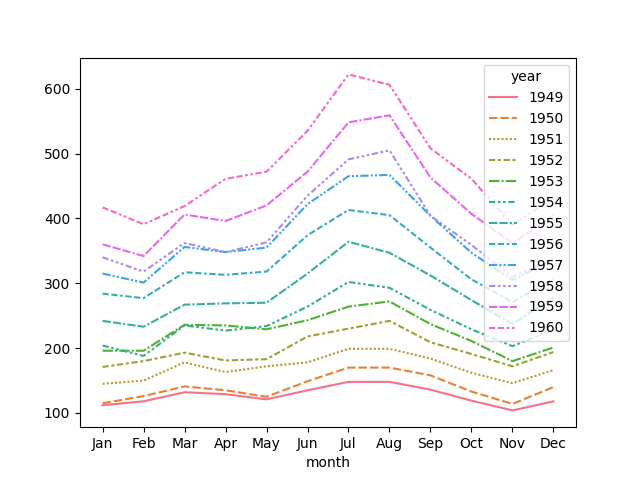

In [ ]:
%matplotlib widget
sns.lineplot(data=flights_data_pivot)

###  
#### <span style="color:#127C02">*Arithmetic Operations with Where*</span>

The where clause from the numpy library can be used to perform arithmetic operations on Pandas dataframe. For instance, in the following script, the where clause is used to add 5 to the rows in the Fare column, where passengers’ ages are greater than 20.

In [ ]:
titanic_data['Fare_plus'] = np.where(titanic_data.Age > 20,
                                     titanic_data.Fare + 5, 
                                     titanic_data.Fare)
display(titanic_data.head())
display(titanic_data.loc[titanic_data.Age<=20,:].head())
#or 
#titanic_data.query('Age<=20').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_plus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,12.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,12.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,58.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13.0500


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_plus
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,21.0750
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,30.0708
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,16.7000
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,8.0500
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,7.8542


###  
#### <span style="color:#127C02">*Create Dataframe From Numpy Array / Dictionary*</span>

Beside creating dataframe from csv file, we can directly create dataframe from numpy array or dictionary.

In [ ]:
df = pd.DataFrame(np.array([[1, 2], [3, 4]]), columns=['col1', 'col2'])
df

,col1,col2
0,1,2
1,3,4


In [ ]:
df = pd.DataFrame({'col1': ['a', 'b', 'b', 'a'], 'col2': np.arange(4)})
df

,col1,col2
0,a,0
1,b,1
2,b,2
3,a,3


###  
#### <span style="color:#127C02">*Joining Dataframes*</span>

pandas provides various facilities for easily combining together dataframe with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In addition, pandas also provides utilities to compare two dataFrame and summarize their differences.

\
Suppose we have two dataframes as in the following:

In [ ]:
df1 = pd.DataFrame({
    'Name': ['John', 'Linda', 'Jack', 'Marry'],
    'Age': [23, 31, np.NaN, 15]
})
df1

,Name,Age
0,John,23.0
1,Linda,31.0
2,Jack,NaN
3,Marry,15.0


In [ ]:
df2 = pd.DataFrame({
    'Name': ['Eric', 'Linda', 'Ken', 'Marry'],
    'Email': [
        'Eric@mail.com', 'Linda@mail.com', 'Ken@mail.com', 'Marry@mail.com'
    ]
})
df2

,Name,Email
0,Eric,Eric@mail.com
1,Linda,Linda@mail.com
2,Ken,Ken@mail.com
3,Marry,Marry@mail.com


\
***Inner Join***    
Inner join is the most common type of join you’ll be working with. It returns a dataframe with only those rows that have common characteristics.
An inner join requires each row in the two joined dataframes to have matching column values. This is similar to the intersection of two sets.

In [ ]:
pd.merge(df1, df2, how='inner', on='Name')

,Name,Age,Email
0,Linda,31.0,Linda@mail.com
1,Marry,15.0,Marry@mail.com


\
***Full Join***  
Full Join, also known as Full Outer Join, returns all those records which either have a match in the left or right dataframe.

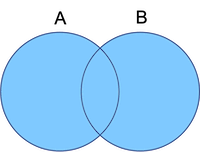

In [ ]:
pd.merge(df1, df2, how='outer', on='Name')

,Name,Age,Email
0,John,23.0,NaN
1,Linda,31.0,Linda@mail.com
2,Jack,NaN,NaN
3,Marry,15.0,Marry@mail.com
4,Eric,NaN,Eric@mail.com
5,Ken,NaN,Ken@mail.com


\
All the non-matching rows of both the dataframes have NaN values for the columns of other dataframes. But we still don’t know which row belongs to which dataframe.  
For this, Pandas provides us with a fantastic solution. We just have to mention the indicator argument as True in the function, and a new column of name _merge will be created in the resulting dataframe:

In [ ]:
pd.merge(df1, df2, how='outer', on='Name', indicator=True)

,Name,Age,Email,_merge
0,John,23.0,NaN,left_only
1,Linda,31.0,Linda@mail.com,both
2,Jack,NaN,NaN,left_only
3,Marry,15.0,Marry@mail.com,both
4,Eric,NaN,Eric@mail.com,right_only
5,Ken,NaN,Ken@mail.com,right_only


\
***Left Join***  
Left join, also known as Left Outer Join, returns a dataframe containing all the rows of the left dataframe.

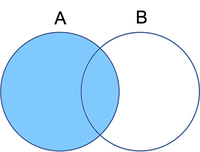

In [ ]:
pd.merge(df1, df2, how='left', on='Name')

,Name,Age,Email
0,John,23.0,NaN
1,Linda,31.0,Linda@mail.com
2,Jack,NaN,NaN
3,Marry,15.0,Marry@mail.com


\
***Right Join***  
Right join, also known as Right Outer Join, is similar to the Left Outer Join. The only difference is that all the rows of the right dataframe are taken as it is and only those of the left dataframe that are common in both.

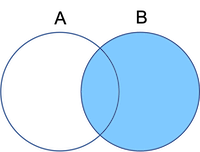

In [ ]:
pd.merge(df1, df2, how='right', on='Name')

,Name,Age,Email
0,Eric,NaN,Eric@mail.com
1,Linda,31.0,Linda@mail.com
2,Ken,NaN,Ken@mail.com
3,Marry,15.0,Marry@mail.com


###  
#### <span style="color:#127C02">*Handling Redundancy / Duplicates in Joins*</span>

Duplicate values can be tricky obstacles. They can cause problems while performing joins. These values won’t give an error but will simply create redundancy in our resulting dataframe.  
  
\
Suppose we have two dataframes:

In [ ]:
df1 = pd.DataFrame({
    'Name': ['John', 'Linda', 'Jack', 'Marry', 'John'],
    'Age': [23, 31, np.NaN, 15, 23]
})
df1  #John is duplicated

,Name,Age
0,John,23.0
1,Linda,31.0
2,Jack,NaN
3,Marry,15.0
4,John,23.0


In [ ]:
df2 = pd.DataFrame({
    'Name': ['Eric', 'Linda', 'Ken', 'Marry', 'Ken'],
    'Email': [
        'Eric@mail.com', 'Linda@mail.com', 'Ken@mail.com', 'Marry@mail.com',
        'Ken@mail.com'
    ]
})
df2  #Ken is duplicated

,Name,Email
0,Eric,Eric@mail.com
1,Linda,Linda@mail.com
2,Ken,Ken@mail.com
3,Marry,Marry@mail.com
4,Ken,Ken@mail.com


In [ ]:
pd.merge(df1, df2, how='outer', on='Name', indicator=True)

,Name,Age,Email,_merge
0,John,23.0,NaN,left_only
1,John,23.0,NaN,left_only
2,Linda,31.0,Linda@mail.com,both
3,Jack,NaN,NaN,left_only
4,Marry,15.0,Marry@mail.com,both
5,Eric,NaN,Eric@mail.com,right_only
6,Ken,NaN,Ken@mail.com,right_only
7,Ken,NaN,Ken@mail.com,right_only


\
We can use drop_duplicates() to remove duplicated rows in joined dataframe.

In [ ]:
pd.merge(df1, df2, how='outer', on='Name', indicator=True).drop_duplicates()

,Name,Age,Email,_merge
0,John,23.0,NaN,left_only
2,Linda,31.0,Linda@mail.com,both
3,Jack,NaN,NaN,left_only
4,Marry,15.0,Marry@mail.com,both
5,Eric,NaN,Eric@mail.com,right_only
6,Ken,NaN,Ken@mail.com,right_only


\
We can also remove duplicate rows before joining using .drop_duplicates().

In [ ]:
pd.merge(df1.drop_duplicates(),
         df2.drop_duplicates(),
         how='outer',
         on='Name',
         indicator=True)

,Name,Age,Email,_merge
0,John,23.0,NaN,left_only
1,Linda,31.0,Linda@mail.com,both
2,Jack,NaN,NaN,left_only
3,Marry,15.0,Marry@mail.com,both
4,Eric,NaN,Eric@mail.com,right_only
5,Ken,NaN,Ken@mail.com,right_only


###  
#### <span style="color:#127C02">*Split a String Column*</span>

A common problem is how to split a string column into components.
For example, split name and surname.

In [ ]:
df = pd.DataFrame(dict(name=['John Smith', 'Kim Saika', 'Rose Miller']))
df

,name
0,John Smith
1,Kim Saika
2,Rose Miller


\
The key step is the expand keyword argument of split() that converts the result into a dataframe.  
The result can be assigned into the same dataframe using the following:

In [ ]:
df[['first', 'last']] = df.name.str.split(' ', expand=True)
df

,name,first,last
0,John Smith,John,Smith
1,Kim Saika,Kim,Saika
2,Rose Miller,Rose,Miller


\
Note that failing to use the expand keyword argument results in an output series instead of a dataframe.

In [ ]:
x = df.name.str.split(' ')
print(x)
type(x)

0     [John, Smith]
1      [Kim, Saika]
2    [Rose, Miller]
Name: name, dtype: object


pandas.core.series.Series